## **Solo ejecutar base de datos**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
from keras.utils import np_utils
import random as rand
import progressbar as pb
import numpy as np
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#importamos DataFrame de nombre de las imágenes
PATH = '/content/drive/MyDrive/Radar_Challenge/Data-Base/Data_IAC' #ruta donde se encuentra los nombres de las clases

n = 350 ## cantidad de datos, la data total es 350

data_train = pd.read_csv("{}/{}/Data_train_{}.csv".format(PATH,n,n))
data_val = pd.read_csv("{}/{}/Data_val_{}.csv".format(PATH,n,n))
data_test = pd.read_csv("{}/Test/Data_test.csv".format(PATH))

names = data_train.columns.values

data_test.shape

(150, 10)

In [ ]:
# Crea data de entrenamiento, validacióm y test con la ruta de las imágenes
path = '/content/drive/MyDrive/Radar_Challenge/Data-Base/Data-Complet/GeoTIFF/' # ruta donde se encuentra las imágenes

rutas_train = []
for clase in names:
  for idx in range(len(data_train[clase])):
    aux = clase
    rutas_train.append( path + aux.split('Class_')[1] +'/'+ data_train[clase][idx])

rutas_val = []
for clase in names:
  for idx in range(len(data_val[clase])):
    aux = clase
    rutas_val.append( path + aux.split('Class_')[1] +'/'+ data_val[clase][idx])

rutas_test = []
for clase in names:
  for idx in range(len(data_test[clase])):
    aux = clase
    rutas_test.append( path + aux.split('Class_')[1] +'/'+ data_test[clase][idx])

#Desordenando
rand.shuffle(rutas_train)
rand.shuffle(rutas_val)
rand.shuffle(rutas_test)

In [ ]:
#Crear X_train de entrenamiento

X_train=[]
IMG_SIZE = (300,300) #redimensionamos la imágen

for i in pb.progressbar(range(len(rutas_train))):
  img_path = rutas_train[i]
  img = cv2.imread(img_path)
  img = cv2.resize(img, IMG_SIZE)
  X_train.append([img])

#Crear x_val de validation
X_val=[]
for i in pb.progressbar(range(len(rutas_val))):
  img_path = rutas_val[i]
  img = cv2.imread(img_path)
  img = cv2.resize(img, IMG_SIZE)
  X_val.append([img])

#Crear test
test = []
for i in pb.progressbar(range(len(rutas_test))):
  img_path = rutas_test[i]
  img = cv2.imread(img_path)
  img = cv2.resize(img, IMG_SIZE)
  test.append([img])
  #if i >= 150: break

#Formato para entrenamiento
X_train = np.squeeze(np.array(X_train))
X_val = np.squeeze(np.array(X_val))
test = np.squeeze(np.array(test))

X_train.shape, X_val.shape, test.shape

100% (2450 of 2450) |####################| Elapsed Time: 0:17:01 Time:  0:17:01
100% (1050 of 1050) |####################| Elapsed Time: 0:07:38 Time:  0:07:38
100% (1500 of 1500) |####################| Elapsed Time: 0:00:13 Time:  0:00:13


((2450, 300, 300, 3), (1050, 300, 300, 3), (1500, 300, 300, 3))

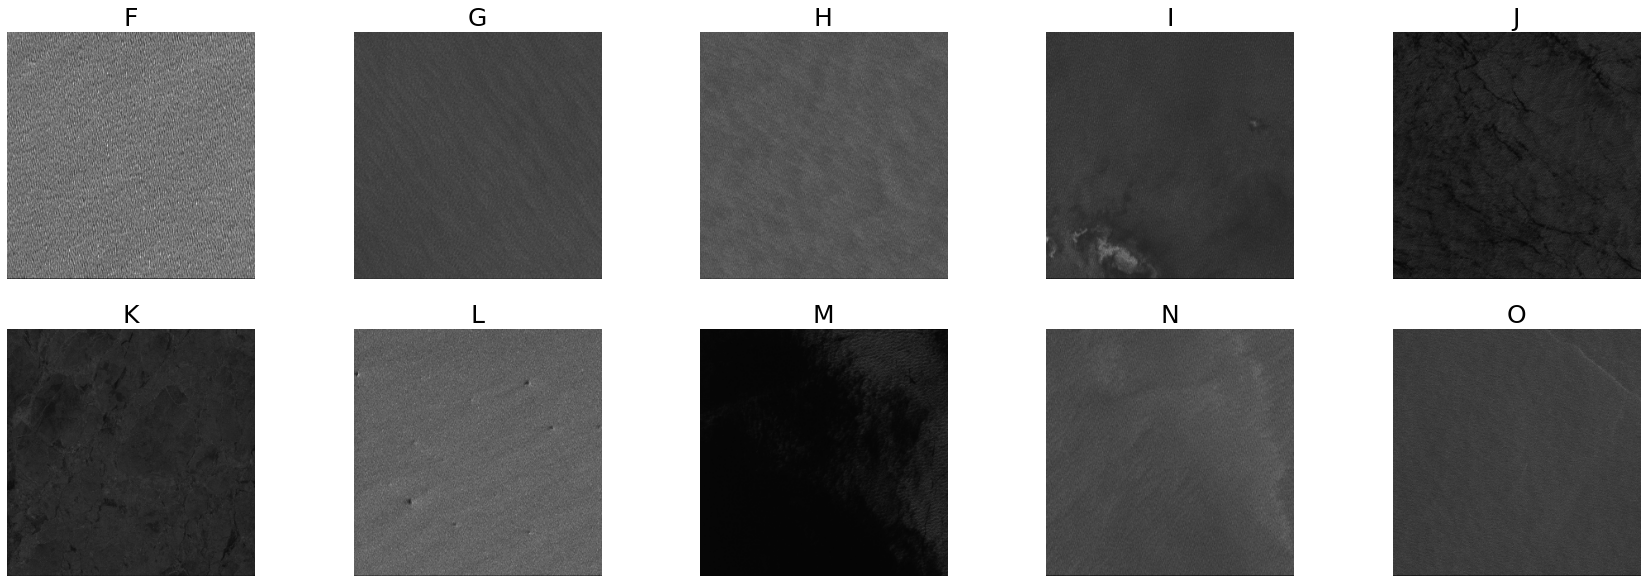

In [ ]:
#mostrar un elemento de cada clase
PATH = '/content/drive/MyDrive/Radar_Challenge/Data-Base/Data_IAC/500'
data = pd.read_csv(PATH + '/Data_Complete_500.csv')
names = data.columns.values
path = '/content/drive/MyDrive/Radar_Challenge/Data-Base/Data-Complet/GeoTIFF'
IMG_SIZE = (300,300)
r, c = 2, 5
cont = 0
fig = plt.figure(figsize=(6*c, 5*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        clase = names[cont]
        ix = random.randint(0, data.shape[0]-1)        
        name = data[clase][ix]
        clase = names[cont].split('Class_')[1]
        img = cv2.imread(f'{path}/{clase}/{name}')
        img = cv2.resize(img, IMG_SIZE)
        plt.imshow(img)
        label = clase
        plt.title(label,fontsize=25)
        plt.axis(False)
        cont+=1
plt.show()

In [ ]:
def create_label(rutas_type_data):
  labels = []

  for ruta in rutas_type_data:
    if ruta[70] == 'F':
      labels.append(0)
    if ruta[70] == 'G':
      labels.append(1)
    if ruta[70] == 'H':
      labels.append(2)
    if ruta[70] == 'I':
      labels.append(3)
    if ruta[70] == 'J':
      labels.append(4)
    if ruta[70] == 'K':
      labels.append(5)
    if ruta[70] == 'L':
      labels.append(6)
    if ruta[70] == 'M':
      labels.append(7)
    if ruta[70] == 'N':
      labels.append(8)
    if ruta[70] == 'O':
      labels.append(9)
  return labels

#Construyendo etiquetas
labels_train = create_label(rutas_train)
labels_val = create_label(rutas_val)
labels_test = create_label(rutas_test)

np.shape(labels_train), np.shape(labels_val), np.shape(labels_test)

((350,), (150,), (1500,))

In [ ]:
#Etiquetas de entrenamiento
y_train = np_utils.to_categorical(labels_train)
y_val = np_utils.to_categorical(labels_val)

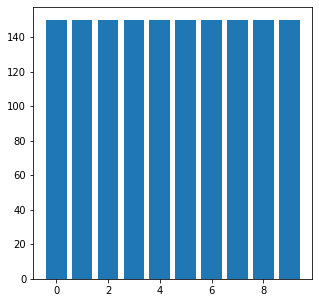

In [ ]:
#observando distribución
import numpy as np
n=10
h = np.zeros(10)
for label in labels_test:
		h[label] += 1

plt.figure(figsize=(5,5))
plt.bar(range(n),h[0:n])
plt.show()

## **Neuronal Network**

In [ ]:
import tensorflow
from keras.utils import np_utils
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Model

In [ ]:
img_size = 300
#nb_train_samples = len(Data_train)
#nb_validation_samples = len(data_valid)
width_shape = img_size #declarado en la parte inicial
height_shape = img_size
num_classes = 10 #una sola salida
epochs = 200
batch_size = 32

In [ ]:
###########
## baseline
###########
#Red no secuencial con tres capas en paralelo
inputs = keras.Input(shape=(width_shape, height_shape, 3), name="img") # capa que recibe la imágen
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #capa que normaliza la imágen

##########################################################################################################
# capas no secuenciales
##########################################################################################################

x = layers.Conv2D(16, 3, activation="relu", strides=(1, 1),padding="same")(x) # (Capa_Cov_1)

#Tienen que tener la misma cantidad de kernel

x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3, activation="relu",strides=(1, 1),padding="same")(x) #(Capa_Cov_2)
block_1_output = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu",strides=(1, 1),padding="same")(block_1_output) #(Capa_Cov_3)
block_2_output = layers.add([x, block_1_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_2_output) #(Capa_Cov_4)

x = layers.MaxPooling2D(3)(x)

##########################################################################################################
# las capas tower tienen que tener la misma cantidad de kernel

tower_1 = layers.Conv2D(64, 3, activation="relu",strides=(1, 1),padding="same")(x)
#tower_1 = layers.MaxPooling2D(3)(tower_1)

tower_2 = layers.Conv2D(64, 5, activation="relu",strides=(1, 1),padding="same")(x)
#tower_2 = layers.MaxPooling2D(3)(tower_2)

tower_3 = layers.Conv2D(64, 7, activation="relu", strides=(1, 1),padding="same")(x)
#tower_3 = layers.MaxPooling2D(3)(tower_3)

#tower = layers.add([tower_1,tower_2,tower_3])

##########################################################################################################
# aplanamos la red
merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
merged = Flatten()(merged)

##########################################################################################################

out = layers.Dense(216, activation='relu')(merged) #512
out = layers.Dropout(0.5)(out)# dropout
out = layers.Dense(512, activation='relu')(merged) #128
out = layers.Dropout(0.5)(out)# dropout

##########################################################################################################
outputs = layers.Dense(10, activation='softmax')(out)

#cramos la red
GeophysicalNet = keras.Model(inputs, outputs, name = "GeophysicalNet")
GeophysicalNet.summary()

# Definiendo hiperparámetros
GeophysicalNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "GeophysicalNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_16 (Rescaling)       (None, 300, 300, 3)  0           ['img[0][0]']                    
                                                                                                  
 conv2d_112 (Conv2D)            (None, 300, 300, 32  896         ['rescaling_16[0][0]']           
                                )                                                                 
                                                                                     

In [ ]:
##########################################################################################################
##########################################################################################################
#                                               ENSAYOS
##########################################################################################################
##########################################################################################################

#Red no secuencial con tres capas en paralelo
inputs = keras.Input(shape=(width_shape, height_shape, 3), name="img") # capa que recibe la imágen
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #capa que normaliza la imágen

##########################################################################################################
# capas no secuenciales
##########################################################################################################

x = layers.Conv2D(16, 3, activation="relu", strides=(1, 1),padding="same")(x) # (Capa_Cov_1)

#Tienen que tener la misma cantidad de kernel

x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3, activation="relu",strides=(1, 1),padding="same")(x) #(Capa_Cov_2)
block_1_output = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu",strides=(1, 1),padding="same")(block_1_output) #(Capa_Cov_3)
block_2_output = layers.add([x, block_1_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_2_output) #(Capa_Cov_4)

block_3_output = layers.add([x, block_2_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_3_output) #(Capa_Cov_5)

block_4_output = layers.add([x, block_3_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_4_output) #(Capa_Cov_6)

block_5_output = layers.add([x, block_4_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_5_output) #(Capa_Cov_6)

block_6_output = layers.add([x, block_5_output])
x = layers.Conv2D(32, 3, activation="relu", padding="same")(block_6_output) #(Capa_Cov_6)

x = layers.MaxPooling2D(3)(x)

##########################################################################################################
# las capas tower tienen que tener la misma cantidad de kernel

tower_1 = layers.Conv2D(64, 3, activation="relu",strides=(1, 1),padding="same")(x)
#tower_1 = layers.MaxPooling2D(3)(tower_1)

tower_2 = layers.Conv2D(64, 5, activation="relu",strides=(1, 1),padding="same")(x)
#tower_2 = layers.MaxPooling2D(3)(tower_2)

tower_3 = layers.Conv2D(64, 7, activation="relu", strides=(1, 1),padding="same")(x)
#tower_3 = layers.MaxPooling2D(3)(tower_3)

#tower = layers.add([tower_1,tower_2,tower_3])

##########################################################################################################
# aplanamos la red
merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
merged = Flatten()(merged)

##########################################################################################################

out = layers.Dense(216, activation='relu')(merged) #512
out = layers.Dropout(0.5)(out)# dropout
out = layers.Dense(512, activation='relu')(merged) #128
out = layers.Dropout(0.5)(out)# dropout

##########################################################################################################
outputs = layers.Dense(10, activation='softmax')(out)

#cramos la red
GeophysicalNet = keras.Model(inputs, outputs, name = "GeophysicalNet")
GeophysicalNet.summary()

# Definiendo hiperparámetros
GeophysicalNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "GeophysicalNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 300, 300, 3)  0           ['img[0][0]']                    
                                                                                                  
 conv2d_26 (Conv2D)             (None, 300, 300, 32  896         ['rescaling_4[0][0]']            
                                )                                                                 
                                                                                     

In [ ]:
#calculando FLOPS (es un conteo de las operaciones matematicas que va a realizar el modelo en cada entrenaiento)
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import  convert_variables_to_constants_v2_as_graph

def get_flops(model):
    concrete = tf.function(lambda inputs: model(inputs))
    concrete_func = concrete.get_concrete_function(
        [tf.TensorSpec([1, *inputs.shape[1:]]) for inputs in model.inputs])
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(concrete_func)
    with tf.Graph().as_default() as graph:
        tf.graph_util.import_graph_def(graph_def, name='')
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=graph, run_meta=run_meta, cmd="op", options=opts)
        return flops.total_float_ops // 2


print("The FLOPs is:{}".format(get_flops(GeophysicalNet)) ,flush=True )

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
The FLOPs is:553577558


In [ ]:
# Entrenando red neuronal
#tensorboardCNN_AD = TensorBoard(log_dir='logs/cnn_AD')
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

mcp_save = ModelCheckpoint('{epoch:02d}-{val_loss:.2f}_mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

historial_GeophysicalNet = GeophysicalNet.fit(
    #data_gen_entrenamiento,
    X_train, y_train,
    epochs=epochs, batch_size= batch_size,#64
    validation_data=(X_val, y_val),
    steps_per_epoch=int(np.ceil(len(X_train) /batch_size)),
    validation_steps=int(np.ceil(len(y_val) / batch_size))
    #callbacks=[mcp_save]
)

##**Results Obtained**

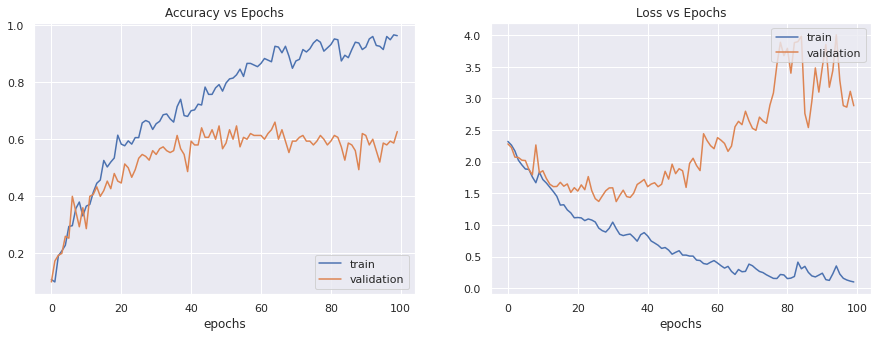

In [ ]:
#Graficas de precisión
acc = historial_GeophysicalNet.history['accuracy']
val_acc = historial_GeophysicalNet.history['val_accuracy']

loss = historial_GeophysicalNet.history['loss']
val_loss = historial_GeophysicalNet.history['val_loss']


np.save(acc,'/content/acc_1.n')
#guardar acc, val_acc, val_loss, loss

rango_epocas = range(epochs)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='train')
plt.plot(rango_epocas, val_acc, label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='train')
plt.plot(rango_epocas, val_loss, label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
print(tf.__version__)

2.8.2


## **Notas:**
- aumentar capas densas en la parte final no ayuda
- Menos neuronas en la capa de salida mejora el modelo **texto en negrita**

## **Métricas de desempeño**

In [ ]:
predic = []
class_names=['PureWave','WindStreak','Windcell','RainCell','BioSlick','SeaIce','IceBerg','LowWind','AtmFront','OcenaFront']
for i in pb.progressbar(range(len(test))):
  #Extraemos imágen
  img = test[i]
  img = (np.expand_dims(img,0))
  #Realizamos predicción
  predictions_single = np.squeeze(GeophysicalNet.predict(img))
  max = np.max(predictions_single)
  cont = 0
  #hallamo posición de predicción
  for valor in predictions_single:
    if(max == valor):
      idx = cont
    cont=cont+1

  #predicción
  txt = class_names[idx]
  per = str(round(max*100))

  #Creando arreglo de predicciones
  predic.append(txt)

real = []
for i in range(len(test)):
  if(labels_test[i]==0): real.append(class_names[0])
  if(labels_test[i]==1): real.append(class_names[1])
  if(labels_test[i]==2): real.append(class_names[2])
  if(labels_test[i]==3): real.append(class_names[3])
  if(labels_test[i]==4): real.append(class_names[4])
  if(labels_test[i]==5): real.append(class_names[5])
  if(labels_test[i]==6): real.append(class_names[6])
  if(labels_test[i]==7): real.append(class_names[7])
  if(labels_test[i]==8): real.append(class_names[8])
  if(labels_test[i]==9): real.append(class_names[9])

100% (1500 of 1500) |####################| Elapsed Time: 0:01:10 Time:  0:01:10


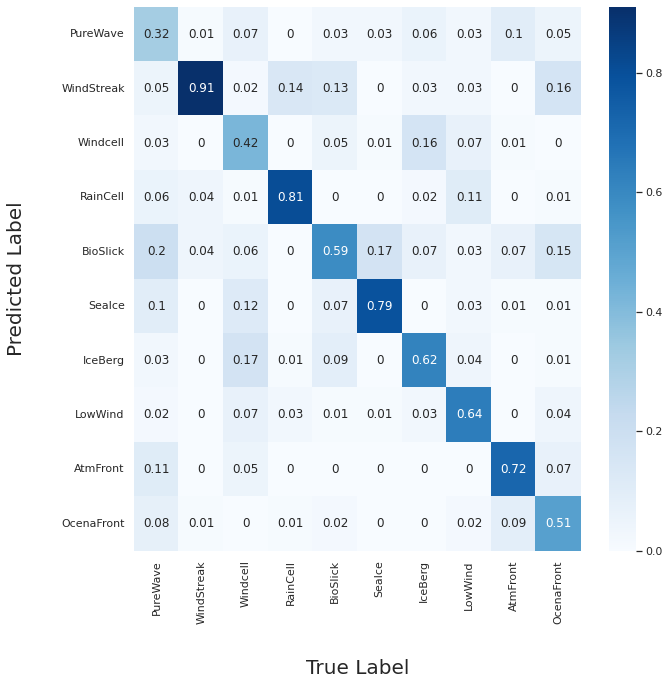

In [ ]:
#Confusion_Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
mat = confusion_matrix(predic, real)/(len(test)/10)
w, h = mat.shape
for j in range(h):
  for i in range(w):
    mat[i][j] = round(mat[i][j],2)
sns.heatmap(mat, annot=True, cbar=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
axes.xaxis.labelpad = 35
axes.yaxis.labelpad = 35

In [ ]:
print( classification_report(real, predic))

              precision    recall  f1-score   support

    AtmFront       0.47      0.32      0.38       150
    BioSlick       0.61      0.91      0.73       150
     IceBerg       0.56      0.42      0.48       150
     LowWind       0.76      0.81      0.78       150
  OcenaFront       0.43      0.59      0.50       150
    PureWave       0.71      0.79      0.74       150
    RainCell       0.64      0.62      0.63       150
      SeaIce       0.75      0.64      0.69       150
  WindStreak       0.75      0.72      0.73       150
    Windcell       0.68      0.51      0.58       150

    accuracy                           0.63      1500
   macro avg       0.64      0.63      0.63      1500
weighted avg       0.64      0.63      0.63      1500



In [ ]:
#Guardando modelo
path = '/content/drive/MyDrive/Radar_Challenge/Modelo/IAC/mobilenet_1'
GeophysicalNet.save_weights(path +'/GeophysicalNet_weight_1.h5')
GeophysicalNet.save(path + '/GeophysicalNet_1.h5')

## **Borrador**

In [ ]:
train = pd.read_csv(f'{PATH}/train_split.csv')
#train = pd.read_csv(f'{PATH}/subset.csv')
val = pd.read_csv(f'{PATH}/val_split.csv')

train.shape, val.shape

In [ ]:
train.head()

In [ ]:
BATCH_SIZE = 64
AUTO = tf.data.experimental.AUTOTUNE

def decode(filename, label):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)
    return img, label

def load_ds(df):
    options = tf.data.Options()
    options.experimental_deterministic = False
    imgs, labels = df["image_name"].values, df["target"].values
    imgs = [f'{PATH}/jpeg224/train/{img}.jpg' for img in imgs]
    ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
    ds = ds.with_options(options)
    ds = ds.map(decode, num_parallel_calls=AUTO)
    ds = ds.cache()
    ds = ds.shuffle(2048)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTO)
    return ds

In [ ]:
train_ds = load_ds(train)
val_ds = load_ds(val)

In [ ]:
IMAGE_SIZE = (224, 224, 3)

encoder = ResNet50V2(
    include_top=False,
    input_shape=IMAGE_SIZE,
    weights='imagenet'
)
encoder.trainable = False

inputs = keras.Input(shape=IMAGE_SIZE)
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = encoder(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")]
)

In [ ]:
filepath = './checkpoints/checkpoint'
cb = tf.keras.callbacks.ModelCheckpoint(
    filepath = filepath,
    monitor="val_auc",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode="max"
)

In [ ]:
model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds, 
    #validation_steps=10,
    callbacks=[cb]
)

In [ ]:
model.load_weights(filepath)
model.save("model.h5")

In [ ]:
model.evaluate(val_ds)

In [ ]:
test = pd.read_csv(f'{PATH}/test.csv')

test.head()

In [ ]:
def decode_test(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)
    return img

def load_test_ds(df):
    imgs = df["image_name"].values
    imgs = [f'{PATH}/jpeg224/test/{img}.jpg' for img in imgs]
    ds = tf.data.Dataset.from_tensor_slices(imgs)
    ds = ds.map(decode_test)
    ds = ds.batch(BATCH_SIZE)
    return ds

In [ ]:
test_ds = load_test_ds(test)

In [ ]:
preds = model.predict(test_ds)

In [ ]:
preds

In [ ]:
submission = pd.DataFrame({'image_name': test['image_name'].values, 'target': preds.ravel()})

submission

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:


#Red no secuencial con tres capas en paralelo
inputs = keras.Input(shape=(width_shape, height_shape, 3), name="img")
x = layers.Conv2D(64, (7,7), activation="relu")(inputs)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D((3,3))(x)

x = layers.Conv2D(128, 2, activation="relu", padding="same")(block_1_output)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(128, 3, activation="relu", padding="same")(block_2_output)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(192, (3,3), activation="relu")(block_3_output)
x = layers.MaxPooling2D(7)(x)

# las capas tower tienen que ser iguales
tower_1 = layers.Conv2D(256, (3,3), activation="relu", padding="same")(x)
tower_1 = layers.MaxPooling2D(3)(tower_1)

tower_2 = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
tower_2 = layers.MaxPooling2D(3)(tower_2)

tower_3 = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
tower_3 = layers.MaxPooling2D(3)(tower_3)

merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
merged = Flatten()(merged)



out = layers.Dense(512, activation='relu')(merged) #512
out = layers.Dropout(0.4)(out)#0.4
out = layers.Dense(128, activation='relu')(merged) #128
out = layers.Dropout(0.3)(out)#0.3
outputs = layers.Dense(10, activation='softmax')(out)

NSCNNMGeophysical = keras.Model(inputs, outputs, name = "CNNGeophysical")
NSCNNMGeophysical.summary()

# Definiendo hiperparámetros
NSCNNMGeophysical.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import torch

In [ ]:
BATCH_SIZE = 64

class Dataset(torch.utils )